**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
#suppressMessages(suppressWarnings(library("DESeq2")))
#suppressMessages(suppressWarnings(library("GGally")))
show_env()

You are working on        Singularity 
BASE DIRECTORY (FD_BASE): /mount 
REPO DIRECTORY (FD_REPO): /mount/repo 
WORK DIRECTORY (FD_WORK): /mount/work 
DATA DIRECTORY (FD_DATA): /mount/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /mount/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /mount/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /mount/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /mount/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /mount/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /mount/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /mount/repo/Proj_ENCODE_FCC/log 
PROJECT APP     (FD_APP): /mount/repo/Proj_ENCODE_FCC/app 
PROJECT REF     (FD_REF): /mount/repo/Proj_ENCODE_FCC/references 



In [2]:
TXT_ASSAY = "STARR_ATAC_K562_Reddy_KS91"

In [3]:
###
txt_assay         = TXT_ASSAY
txt_region_folder = "fcc_astarr_macs"
txt_region_label  = "astarr_macs_input_overlap"

###
txt_fdiry = file.path(
    FD_RES, "assay_fcc", txt_assay, "coverage", 
    txt_region_folder, 
    txt_region_label, 
    "summary"
)
txt_fname = "data_list_count_column.rds"
txt_fpath = file.path(txt_fdiry, txt_fname)

###
lst = readRDS(txt_fpath)

###
lst_dat_ocr_macs_overlap = lst

In [5]:
txt_assay = "STARR_ATAC_K562_Reddy_KS91"
txt_fdiry = file.path(
    FD_RES, 
    "assay_fcc", 
    txt_assay, 
    "coverage", 
    "fcc_astarr_macs", 
    "astarr_macs_input_overlap",
    "summary")

txt_fname = "result.score.mean.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)
dat_score_mean = dat
head(dat)

Chrom,ChromStart,ChromEnd,Region,Input_FPKM,Input_TPM,Output_FPKM,Output_TPM
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
chr1,10038,10405,chr1:10038-10405,0.004164383,3.940038,0.0006671239,0.6488611
chr1,14282,14614,chr1:14282-14614,0.003003325,2.841707,0.0020670469,2.0120603
chr1,16025,16338,chr1:16025-16338,0.004048701,3.830812,0.0012104446,1.1818766
chr1,17288,17689,chr1:17288-17689,0.006551198,6.198372,0.0015784974,1.5431749
chr1,28934,29499,chr1:28934-29499,0.004295316,4.064322,0.0005928433,0.5801715
chr1,115429,115969,chr1:115429-115969,0.015954822,15.096518,0.0260260669,25.3605429


In [41]:
lst = lst_dat_ocr_macs_overlap
dat_cnt = lst$data_cnt
dat_col = lst$data_col

In [32]:
dat = dat_score_mean
dat = dat %>% 
    dplyr::mutate(Lenth = ChromEnd-ChromStart) %>%
    dplyr::left_join(
        dat_cnt, 
        by=c("Chrom", "ChromStart", "ChromEnd", "Region")) %>%
    dplyr::arrange(-Input_TPM)

dat = dat %>%
    dplyr::mutate(across(starts_with("Input.rep"),  cumsum)) %>%
    dplyr::mutate(across(starts_with("Output.rep"), cumsum)) %>%
    dplyr::mutate(Rank = 1:n()) 

fun = function(x){x/max(x)}
dat = dat %>%
    dplyr::mutate(across(starts_with("Input.rep"),  fun)) %>%
    dplyr::mutate(across(starts_with("Output.rep"), fun))

dat_score_cumsum = dat
head(dat)

Chrom,ChromStart,ChromEnd,Region,Input_FPKM,Input_TPM,Output_FPKM,Output_TPM,Lenth,Input.rep1,Input.rep2,Input.rep3,Input.rep4,Input.rep5,Input.rep6,Output.rep1,Output.rep2,Output.rep3,Output.rep4,Rank
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
chr6,158350524,158350525,chr6:158350524-158350525,0.5001804,473.2625,0.36871595,359.33173,1,4.409520e-07,4.596055e-07,5.404159e-07,5.290819e-07,4.517769e-07,5.792501e-07,5.024760e-07,4.388823e-07,2.801738e-07,2.533317e-07,1
chr5,38299166,38299168,chr5:38299166-38299168,0.3095021,292.8529,0.29726386,291.51209,2,1.001329e-06,1.174547e-06,1.108195e-06,1.108898e-06,1.073896e-06,1.248243e-06,1.256190e-06,9.091133e-07,5.253259e-07,1.162345e-06,2
chr19,30043470,30043472,chr19:30043470-30043472,0.3056364,289.1723,0.40107886,391.60992,2,1.580078e-06,1.772764e-06,1.799106e-06,1.688713e-06,1.673797e-06,1.868286e-06,3.014856e-06,1.755529e-06,8.755431e-07,1.415677e-06,3
chr21,44255289,44255291,chr21:44255289-44255291,0.2598045,245.8337,0.08359642,82.35875,2,2.085336e-06,2.356390e-06,2.284796e-06,2.181557e-06,2.177417e-06,2.414902e-06,3.328904e-06,1.786878e-06,9.455866e-07,1.669009e-06,4
chr22,21735361,21736537,chr22:21735361-21736537,0.1335637,126.3877,0.04418007,43.21193,1176,1.688571e-04,1.562075e-04,1.527256e-04,1.547456e-04,1.593810e-04,1.640094e-04,5.382774e-05,4.169382e-05,4.959076e-05,7.044111e-05,5
chr13,91346999,91349378,chr13:91346999-91349378,0.1316392,124.5629,0.15600076,152.70373,2379,4.924424e-04,4.648143e-04,4.570961e-04,4.626857e-04,4.739955e-04,4.839105e-04,4.453822e-04,2.989415e-04,3.839782e-04,5.717547e-04,6


In [44]:
dat = dat_col %>% 
    dplyr::select(Sample, Group) %>% 
    dplyr::mutate(
        Color = ifelse(
            Group == "Input", 
            Group,
            Sample)
        )
dat_grg = dat
dat

Sample,Group,Color
<chr>,<chr>,<chr>
Input.rep1,Input,Input
Input.rep2,Input,Input
Input.rep3,Input,Input
Input.rep4,Input,Input
Input.rep5,Input,Input
Input.rep6,Input,Input
Output.rep1,Output,Output.rep1
Output.rep2,Output,Output.rep2
Output.rep3,Output,Output.rep3


In [46]:
dat = dat_score_cumsum
dat = dat %>% 
    dplyr::select(
        Rank, 
        starts_with("Input.rep"), 
        starts_with("Output.rep")) %>%
    tidyr::gather(Sample, Value, -Rank)

dat = dat %>%
    dplyr::left_join(dat_grg, by="Sample")

dat_score_cumsum_arrange = dat
print(dim(dat))
head(dat)

[1] 1500410       5


Rank,Sample,Value,Group,Color
<int>,<chr>,<dbl>,<chr>,<chr>
1,Input.rep1,4.409520e-07,Input,Input
2,Input.rep1,1.001329e-06,Input,Input
3,Input.rep1,1.580078e-06,Input,Input
4,Input.rep1,2.085336e-06,Input,Input
5,Input.rep1,1.688571e-04,Input,Input
6,Input.rep1,4.924424e-04,Input,Input


In [ ]:
vec = c("#999999", "#E69F00", "#56B4E9")
names(vec) = c("Input", paste("Output.rep", 1:4)
vec_txt_color = vec

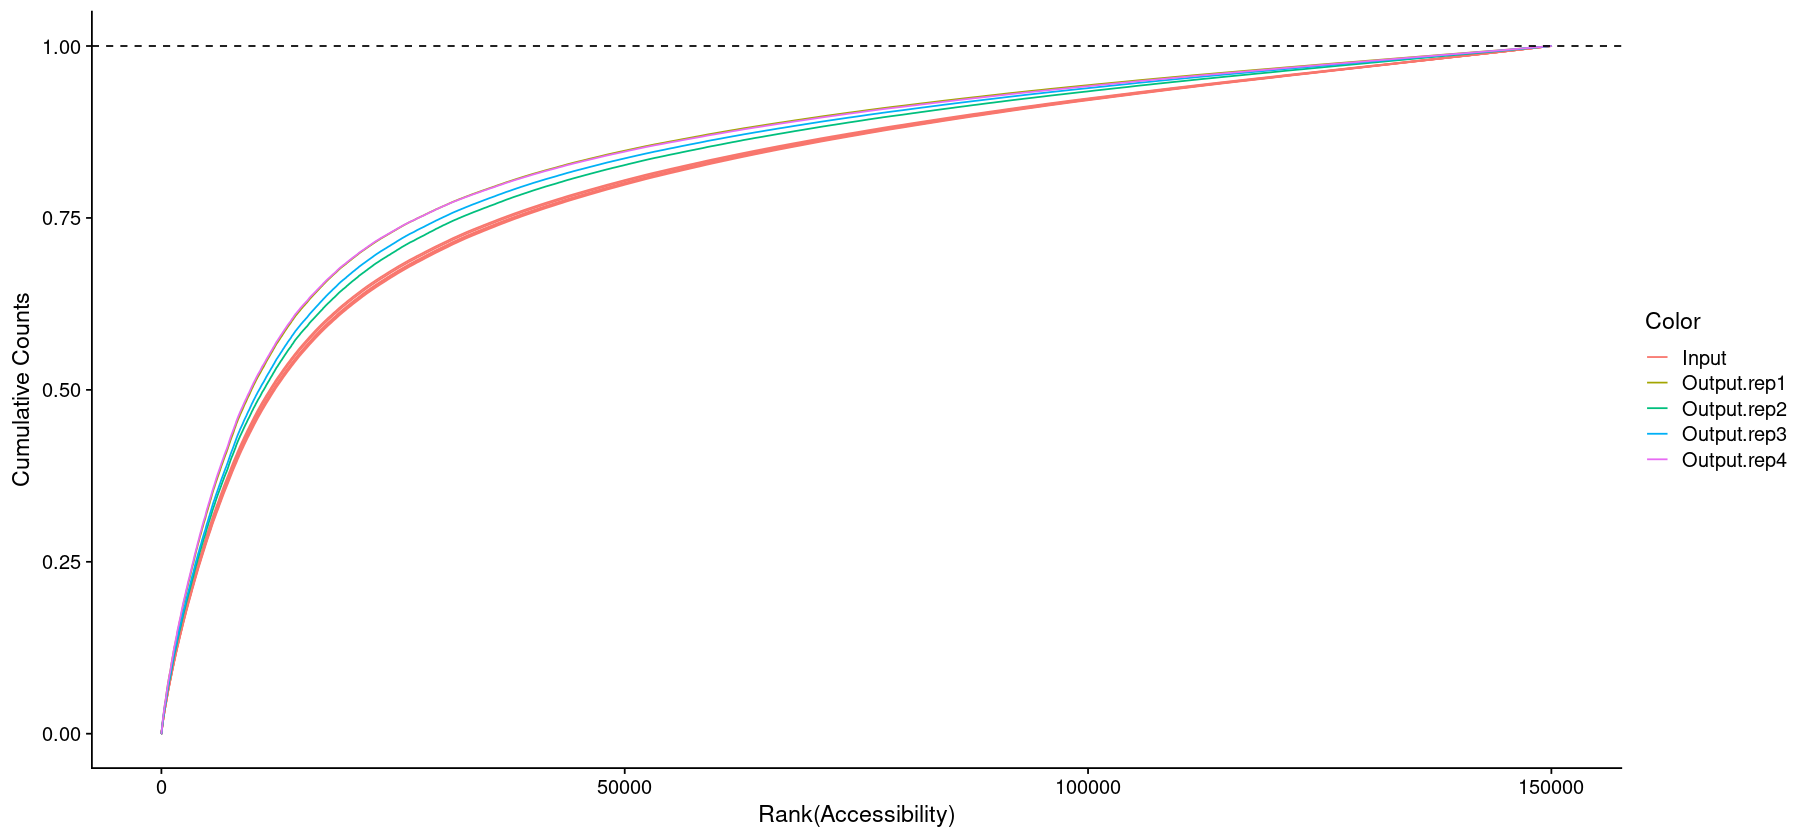

In [50]:
dat = dat_score_cumsum_arrange
gpt = ggplot(dat, aes(x=Rank, y=Value, group=Sample, color=Color)) +
    geom_line() +
    labs(x = "Rank(Accessibility)", y = "Cumulative Counts") +
    geom_hline(yintercept = 1.0, linetype = "dashed") +
    theme_cowplot()

options(repr.plot.width=15, repr.plot.height=7)
print(gpt)

In [ ]:
options(repr.plot.width=10, repr.plot.height=7)
print(gpt)